In [1]:
%load_ext lab_black

In [2]:
# 必要なライブラリーのインポート
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

import graphviz
import lingam
from lingam.utils import make_dot

print([np.__version__, pd.__version__, graphviz.__version__, lingam.__version__])

np.set_printoptions(precision=3, suppress=True)
np.random.seed(100)

['1.21.4', '1.3.4', '0.19.1', '1.5.4']


## 効用関数（Utility function）

In [3]:
def make_graph(adjacency_matrix, labels=None):
    idx = np.abs(adjacency_matrix) > 0.5
    dirs = np.where(idx)
    d = graphviz.Digraph(format="png", engine="dot")
    # フォント設定
    d.attr("node", fontname="MS Gothic", fontsize="10")
    names = labels if labels else [f"x{i}" for i in range(len(adjacency_matrix))]
    for to, from_, coef in zip(dirs[0], dirs[1], adjacency_matrix[idx]):
        d.edge(names[from_], names[to], label=f"{coef:.2f}", fontsize="10")
    return d

In [4]:
# データセットの読込み
boston = load_boston()

# データフレームの作成
# 説明変数の格納
df = pd.DataFrame(boston.data, columns=boston.feature_names)

# 目的変数の追加
df["MEDV"] = boston.target

# データの中身を確認
df.head()

/tmp/Python/python-3.9.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## 統計的因果探索（LiNGAM）

In [5]:
model = lingam.DirectLiNGAM()
model.fit(df)

/tmp/Python/python-3.9.9/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/tmp/Python/python-3.9.9/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a Stand

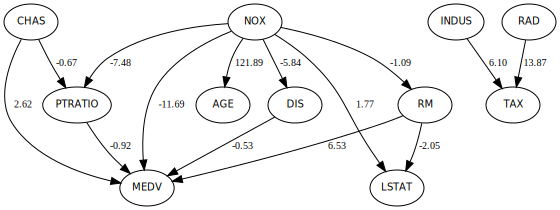

In [6]:
labels = [f"{col}" for i, col in enumerate(df.columns)]
make_graph(model.adjacency_matrix_, labels)

In [7]:
p_values = model.get_error_independence_p_values(df)
print(p_values)

/tmp/Python/python-3.9.9/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/tmp/Python/python-3.9.9/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[[0.    0.    0.      nan 0.    0.001 0.    0.    0.    0.    0.    0.
  0.    0.009]
 [0.    0.    0.      nan 0.    0.334 0.001 0.    0.    0.    0.    0.
  0.    0.063]
 [0.    0.    0.      nan 0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.   ]
 [  nan   nan   nan 0.      nan   nan   nan   nan   nan   nan   nan   nan
    nan   nan]
 [0.    0.    0.      nan 0.    0.002 0.    0.    0.    0.    0.    0.
  0.    0.   ]
 [0.001 0.334 0.      nan 0.002 0.    0.    0.035 0.    0.056 0.    0.048
  0.    0.   ]
 [0.    0.001 0.      nan 0.    0.    0.    0.    0.    0.    0.    0.65
  0.001 0.   ]
 [0.    0.    0.      nan 0.    0.035 0.    0.    0.    0.    0.    0.
  0.058 0.   ]
 [0.    0.    0.      nan 0.    0.    0.    0.    0.    0.    0.    0.
  0.098 0.   ]
 [0.    0.    0.      nan 0.    0.056 0.    0.    0.    0.    0.    0.
  0.    0.   ]
 [0.    0.    0.      nan 0.    0.    0.    0.    0.    0.    0.    0.
  0.291 0.   ]
 [0.    0.    0.      nan 0.    0.048 0.65  0.

In [8]:
# graph = make_graph(model.adjacency_matrix_, labels)

In [9]:
# cleanup=True を指定してDOT言語ファイルを削除
# graph.render('graph', format='png', cleanup=True)